<a href="https://colab.research.google.com/github/mrabhi05/Tensorflow/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Neural Network

Input Layers + Bias -> Function(F(x)) -> Output

In a Densely connected Neural Network, all the neurons are connected to every neuron in the next layer.

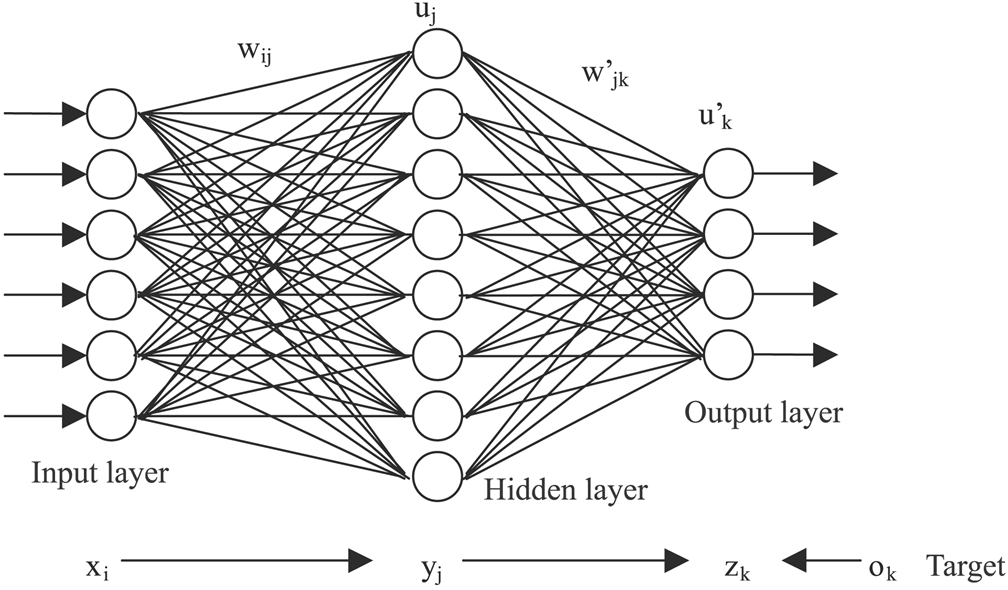

Value of a Neural Network Layer = ∑WiXi + b


### Data 
The type of data a neural network processes varies drastically based on the problem being solved. When we build a neural network we define what shape and kind of data it can accept. It may sometimes be neccessary to modify our dataset so that it can be passed to our neural network.

Some common types of data a neural network uses are listed below.




*   Vector Data (2D)
*   Timeseries or Sequence (3D)
*   Image Data (4D)
*   Video Data (5D)

## Layers 
Each neural network consists of multiple layers. At each layer a different transformation of data occurs. Our initial input data is fed through the layers and eventually arrives at the output layer where we will obtain the result.

#### Input Layer
The input layer is the layer that our initial data is passed to. It is the first layer in our neural network.

#### Output Layer
The output layer is the layer that we will retrive our results from. Once the data has passed through all the other layers it will arrive here.

#### Hidden Layer(s)
All of the other layers in our neural network are called "hidden layers". This is because they are hidden to us, we cannot observe them. Most neural networks consist of at least one hidden layer but can have an unlimited amount. Typically the more complex the model the more hidden layers.


### Neurons
Each layer is made up of what are called neurons. Neurons is responsible for generating/holding/passing ONE numeric value.

This means that in the case of our input layer it will have as many neurons as we have input information. 

For eg. say we want to pass an image that is 28x28 pixels, thats 784 pixels. We would need 784 neurons in our input layer to capture each of these pixels.

A hidden layer can have any number of neurons.

## Connected Layers 

Neurons in one layer will be connected to every neuron in the next layer. This is called a **dense** layer.



## Weights
Weights are associated with each connection in our neural network. Every pair of connected nodes will have one weight that denotes the strength of the connection between them. These are vital to the inner workings of a neural network and will be tweaked as the neural network trained. The model will try to determine what these weights should be to achieve the best result. Weights start out at a constant or random value and will change as the network sees training data

### Biases
Biases are another important part of neural networks and will also be tweaked as the model is trained. A bias is simply a constant value associated with each layer. It can be thought of as an extra neuron that has no connections. The purpose of a bias is to shift an entire activation funcion by a constant value. This allows a lot more flexibilit when it comes to choosing an activation and training the network. Thers is one bias fot each layer.

### Activation Function
Activation functions are simply a function that is applied to the weighted sum of a neuron. They can be anything we want but are typically higher order/degree fuctions that aim to add a higher dimension to our data. We would want to do this to introduce more complexity to our model. By transforming our data to a higher dimension we can typically make better, more complex predictions.

N1 = **F(**∑WiXi + b**)**

A list of some common activation functions and their graphs can be seen below:

*   ReLu

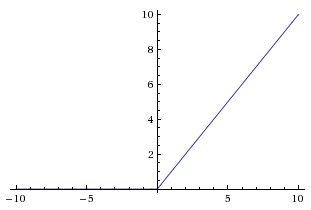

Rectified Linear unit

Takes any value less than zero and makes them zero, i.e. Rectifies all negative numbers to zero.

*   tanh (Hyperbolic Tangent)

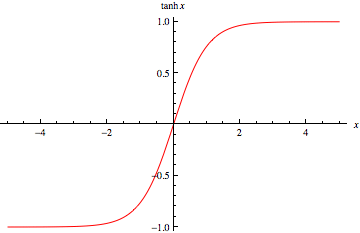


Ranges our values used between -1 to 1.

*   Sigmoid 

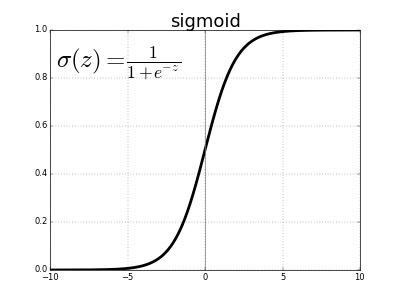

Ranges our value between 0 and 1. Using the formula given above.



### Backpropogation 
Backpropagation is the fundamental algorithmm behind training neural networks. It is what changes the weights and biases of our network. To fully explain this process we need to start by discussing something called a cost/loss function.

### Loss/Cost Function 

  This function is responsible for determining how well the network did. We pass it the output and the expected output and it returns to us some value representing the cost/loss of the network. This effectively makes the networks job to optimize this cost function, trying to make it as low as possible.

  Some common loss/cost function include.



*   Mean Squared Error
*   Mean Absolute Error
*   Hinge Loss

####Gradient Descent
Gradient Descent and Backpropagation are closely related.
Gradient descent is the algorithm used to find the optimal parameters (weights and biases) for our network, while backpropogation is the process of calculating the gradient that is used in the gradient descent step.

Gradient descent requires some pretty advanced calculus and linear algebra to understand.

"Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of the steepest descent as defined by the negative of the gradient. 
In machine learning, we use gradient descent to update the parameters of our model."

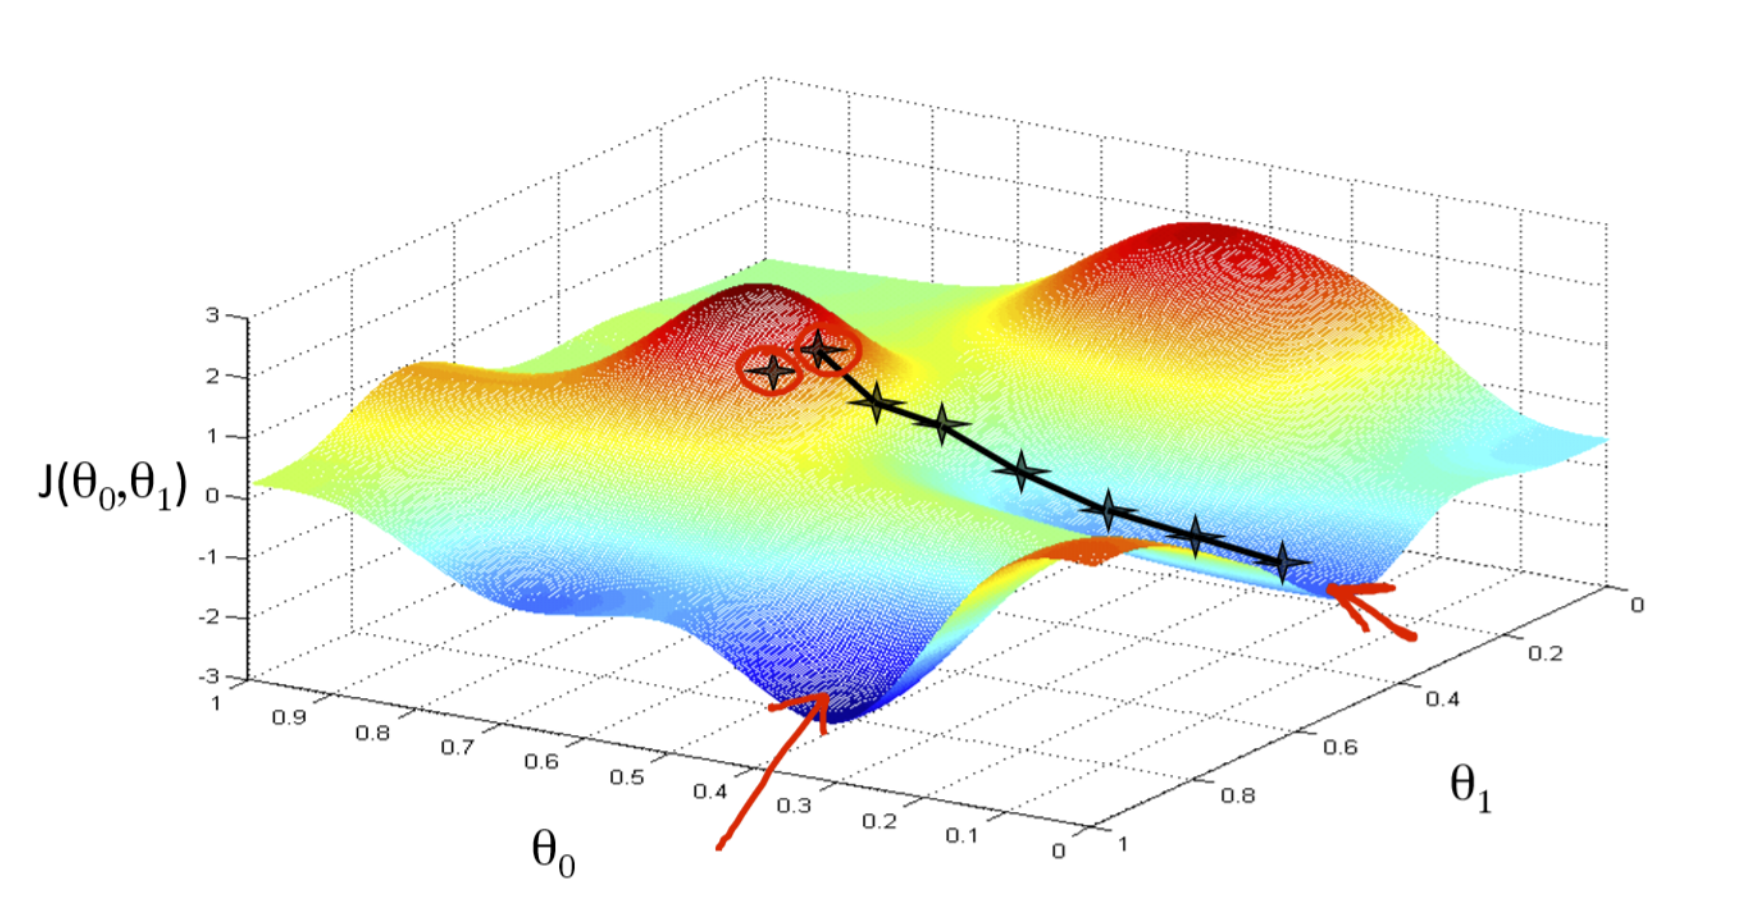

#### Optimizer 
This is simply the function that implements the backpropagation algorithm. Here's a list of a few common ones.



*   Gradient Descent
*   Stochastic Gradient Descent
*   Mini-Batch Gradient Descent
*   Momentum
*   Nesterov Accelerated Gradient



### Creating a Neural Network


#### Imports

In [1]:
%tensorflow_version 2.x
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#### Dataset

We will use the MNIST Fashion Dataset, which is included in keras.

60,000 imgs - Training, 10,000 imgs for Validation/Testing.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # Load Dataset 

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()  # Split into Training and Testing Data

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

So we've got 60,000 images that are made up of 28x28 pixels (784 in total).

In [4]:
train_images[0,23,23] # Let's have a look at one pixel

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image with no color channels.

In [5]:
train_labels[:10] # Let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0-9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which. 

In [6]:
class_names = [
               'T-Shirt/Top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle Boot'
]

Finally 